<a href="https://colab.research.google.com/github/acorreia61201/SAOPythonPrimer/blob/main/solutions/Solutions7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SAO/LIP Python Primer Course Exercise Set 7

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/acorreia61201/SAOPythonPrimer/blob/main/exercises/Exercises7.ipynb)

This exercise set is split between two parts. The first part deals with basic Python I/O, while the second does some more robust numerical analyses using `pandas`.

## Exercise 1.1: Simple File Manipulation

Let's get some practice reading and writing files using Python builtins, as well as navigating directories. Each file that you generate below should have one word per line.

**Your task:** Create a directory called `my_files`. Move to this directory and create two new directories inside it, `dogs` and `fruits`. Check by using `os.listdir()`.

In [ ]:
import os
os.mkdir('my_files') # make my_files directory
os.chdir('my_files') # cd to my_files
os.mkdir('dogs') # make directory my_files/dogs
os.mkdir('fruits') # make directory my_files/fruits
os.listdir() # list contents of my_files; should be the dogs and fruits directories

['fruits', 'dogs']

In [ ]:
os.getcwd() # also check current working directory

'/content/my_files'

**Your task:** Generate two files:
- Create a file `dog_list.txt` using the list `dog_breeds` below, and place it in `dogs`.
- Create a file `fruit_list.txt` using the list `fruit_types` below, and place it in `fruits`.

In [ ]:
dog_breeds = ['pug\n', 'schnauzer\n', 'shiba inu\n', 'poodle\n', 'greyhound\n', 'chihuahua\n', 'great dane\n']
fruit_types = ['apple\n', 'banana\n', 'blueberry\n', 'strawberry\n', 'grape\n', 'pineapple\n', 'cantaloupe\n']

# to print to separate lines, you needed to add \n to the end of each entry above

# create files using 'x' mode and 'r+' mode to create then open file
open('dog_list.txt', 'x')
open('fruit_list.txt', 'x')
df = open('dog_list.txt', 'r+')
ff = open('fruit_list.txt', 'r+')
# alternatively, we could use 'a+' in one open command to create if it doesn't exist and open in r/w mode
# write lists to files
df.writelines(dog_breeds)
ff.writelines(fruit_types)
# close files
df.close()
ff.close()
# move files to respective directories
os.rename('dog_list.txt', 'dogs/dog_list.txt')
os.rename('fruit_list.txt', 'fruits/fruit_list.txt')
# check
print(os.listdir('dogs'))
print(os.listdir('fruits'))


['dog_list.txt']
['fruit_list.txt']


**Your task:** Create a new file `reversed_dogs.txt`. Read in the contents of `dog_list.txt` and write them in reverse order in this new file. Move this file to the `dogs` directory. (Don't just use the lists above; you should use `open()` to get the contents.)

In [ ]:
df = open('dogs/dog_list.txt', 'r+') # open dog_list.txt in r/w mode
open('reversed_dogs.txt', 'x') # create new file
rf = open('reversed_dogs.txt', 'r+') # open new file in r/w mode
init = df.readlines() # read in lines of dog_list.txt as a list
init.reverse() # reverse the list of entries
rf.writelines(init) # write the new list to new file
# close both files
df.close()
rf.close()
# move the new file to the correct directory (alternatively, you could've cd'ed to dogs and done it all there)
os.rename('reversed_dogs.txt', 'dogs/reversed_dogs.txt')

**Your task:** Create a new file `alphabet_fruits.txt`. Read in the contents of `fruit_list.txt` and write them in alphabetical order in this new file. Move this file to the `fruits` directory.

In [ ]:
ff = open('fruits/fruit_list.txt', 'r+') # open fruit_list.txt in r/w mode
open('alphabet_fruits.txt', 'x') # create new file
af = open('alphabet_fruits.txt', 'r+') # open new file in r/w mode
init = ff.readlines() # read in lines of fruit_list.txt as a list
init.sort() # sort the list of entries alphabetically
af.writelines(init) # write the new list to new file
# close both files
ff.close()
af.close()
# move the new file to the correct directory (alternatively, you could've cd'ed to fruits and done it all there)
os.rename('alphabet_fruits.txt', 'fruits/alphabet_fruits.txt')

**Your task:** Write a loop below that reads in `dogs/dogs_list.txt` and prints out the names of dogs that contain the letter `a`. Write these names to a new file, `dog_count.txt`, in the current working directory (i.e. `my_files`).

In [ ]:
df = open('dogs/dog_list.txt') # open dog_list.txt in read mode (default)
open('dog_count.txt', 'x') # create new file
dc = open('dog_count.txt', 'r+') # open new file in r/w mode
line = df.readline() # get the first line of dog_list.txt
while line != '': # iterate until reaching empty line (i.e. EOF)
    if 'a' in line: # if a is in the current line
        print(line) # print the line out
        dc.write(line) # write the line to the new file
    line = df.readline() # update the variable line with the next line down
# close the files
dc.close()
df.close()

schnauzer

shiba inu

chihuahua

great dane



**Your task:** Write a loop that reads in `fruits/fruit_list.txt` and prints out the names of fruits with more than 7 letters. Write these names to a new file, `fruit_count.txt`, in the current working directory (i.e. `my_files`).

In [ ]:
ff = open('fruits/fruit_list.txt') # open fruit_list.txt in read mode (default)
open('fruit_count.txt', 'x') # create new file
fc = open('fruit_count.txt', 'r+') # open new file in r/w mode
line = ff.readline() # get the first line of fruit_list txt
while line != '': # iterate until reaching empty line (i.e. EOF)
    if len(line) > 8: # \n is its own character, so we want 7 letters plus one
        print(line) # print the line out
        fc.write(line) # write the line to the new file
    line = ff.readline() # update the variable line with the next line down
# close the files
fc.close()
ff.close()

blueberry

strawberry

pineapple

cantaloupe



## Exercise 1.2: Find and Replace Substrings in Files

In this exercise, we'll be using the Gettysburg Address file that was downloaded in the lecture. If you need to download or re-download the file, run the cell below (be sure to rename it if necessary).

In [ ]:
!wget https://collincapano.com/wp-content/uploads/2023/01/gettysburg_address-bliss_copy.txt

--2023-06-12 14:28:36--  https://collincapano.com/wp-content/uploads/2023/01/gettysburg_address-bliss_copy.txt
Resolving collincapano.com (collincapano.com)... 162.241.225.81
Connecting to collincapano.com (collincapano.com)|162.241.225.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477 (1.4K) [text/plain]
Saving to: ‘gettysburg_address-bliss_copy.txt’

gettysburg_address- 100%[===================>]   1.44K  --.-KB/s    in 0s      

2023-06-12 14:28:36 (140 MB/s) - ‘gettysburg_address-bliss_copy.txt’ saved [1477/1477]



**Your task:** Write a loop below that searches the file for the string 'here' (don't worry about caps; none of the occurrences of 'here' are capitalized anyways). If a line contains 'here', print that line to screen along with its line number. Treat the first line as line 1. At the end, print out the number of occurrences of 'here' in the file.

In [ ]:
gb = open('gettysburg_address-bliss_copy.txt', 'r+') # open in read/write mode
lines = gb.readlines() # read in lines as a list
count = 0 # placeholder for num occurrences
for i in range(len(lines)): # iterate over indices in list of lines
    if ' here' in lines[i]: # check if here is in current line
        print(f'{i+1}: {lines[i]}') # print the line number (index + 1) and the line
        count += 1 # add 1 to the counter

gb.close() # close the document outside the loop
print(f'Total occurrences: {count}') # print total num occurrences

# notice that I used ' here' instead of 'here'. This ensures that I only get instances of 'here' and not 'there' or 'where'.
# I didn't put a space at the end since that would exclude 'here.' (i.e. word at the end of a sentence)
# this has the disadvantage of possibly picking up words like 'hereby'; for this, it's okay if we're not using the most sophisticated technique possible

8: a final resting place for those who here gave their lives that that nation

12: not hallow -- this ground. The brave men, living and dead, who struggled here,

14: little note, nor long remember what we say here, but it can never forget what

15: they did here.

17: It is for us the living, rather, to be dedicated here to the unfinished work

18: which they who fought here have thus far so nobly advanced. It is rather for us

19: to be here dedicated to the great task remaining before us -- that from these

21: last full measure of devotion -- that we here highly resolve that these dead

Total occurrences: 8


**Your task:** Now, write a loop that replaces every occurrence of 'here' with 'there'. You will need to make use of the method `readobj.replace()`, where `readobj` is a placeholder for `file.read()` for a given `file`. The first input for `replace()` is the string you wish to replace, and the second is the string you want to replace it with. (If you need help, see the examples at https://linuxhint.com/python-replaces-string-file/.) Write the changes to the same file, and use `read()` to check if the changes were correct.

In [ ]:
# contrary to what I said in the directions, you don't need to do this over a loop

# first, read in the lines, replacing here with there
gb = open('gettysburg_address-bliss_copy.txt', 'r') # open in read only mode
lines = gb.read() # save the entire document to a variable
lines = lines.replace(' here', ' there') # change all instances of here to there inplace
gb.close() # close

# then, modify the document in-place
gb = open('gettysburg_address-bliss_copy.txt', 'w') # open in write mode; 'w' overwrites file contents
gb.write(lines) # overwrite text with modified text from above
gb.close() # close again

# check by-eye; you may also use the loop above to find 'there'
reading = open('gettysburg_address-bliss_copy.txt', 'r') # open in read only mode
print(reading.read()) # print the contents

# I'll reiterate a distinction I made here:
# 'w' opens a file in write mode. Any additions will overwrite anything already in the file
# 'r+' opens a file in read/write mode. Any additions are appended to the end of the existing file without overwriting anything

Four score and seven years ago our fathers brought forth on this continent, a
new nation, conceived in Liberty, and dedicated to the proposition that all men
are created equal.

Now we are engaged in a great civil war, testing whether that nation, or any
nation so conceived and so dedicated, can long endure. We are met on a great
battle-field of that war. We have come to dedicate a portion of that field, as
a final resting place for those who there gave their lives that that nation
might live. It is altogether fitting and proper that we should do this.

But, in a larger sense, we can not dedicate -- we can not consecrate -- we can
not hallow -- this ground. The brave men, living and dead, who struggled there,
have consecrated it, far above our poor power to add or detract. The world will
little note, nor long remember what we say there, but it can never forget what
they did there.

It is for us the living, rather, to be dedicated there to the unfinished work
which they who fought there

## Exercise 2.1: Gravitational Waves

We'll do a couple simple examples with plotting and analyzing data using *gravitational wave* data. Gravitational waves are ripples in spacetime casued by the orbit and merger of two objects. With current technology, we have so far only been able to detect gravitational waves from systems involving black holes and neutron stars, the two densest astrophysical objects.

Download the following data:

In [ ]:
!wget https://raw.githubusercontent.com/acorreia61201/SAOPythonPrimer/main/files/GW150914.csv

--2023-06-12 14:49:53--  https://raw.githubusercontent.com/acorreia61201/SAOPythonPrimer/main/files/GW150914.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124617 (122K) [text/plain]
Saving to: ‘GW150914.csv’

GW150914.csv        100%[===================>] 121.70K  --.-KB/s    in 0.02s   

2023-06-12 14:49:53 (5.17 MB/s) - ‘GW150914.csv’ saved [124617/124617]



This is the initial data release for GW150914, the first direct detection of a gravitational wave from a binary black hole merger. The first column t lists the times in seconds of the analysis, and the second column h lists the *strain* in units of $10^{-21}$, a technical term for the wave amplitude.

**Your task:** Load the data from above using `pandas`. Assign the name 'Times' to column t and 'Strains' to column h. Check that you read in the data correctly. The data should run from 0.25 to a little less than 0.46 seconds.

In [ ]:
import pandas as pd
gw = pd.read_csv('GW150914.csv', names=['Times', 'Strains'], skiprows=1) # read the csv
# note on the options:
# names takes in a list of titles you want to assign the columns
# skiprows defines how many rows from the start you want to omit from the file.
gw

,Times,Strains
0,0.250000,0.024548
1,0.250061,0.015293
2,0.250122,0.006372
3,0.250183,-0.002075
4,0.250244,-0.009889
...,...,...
3436,0.459717,0.177196
3437,0.459778,0.180618
3438,0.459839,0.183392
3439,0.459900,0.185412


**Your task:** Let's plot the data to see what a typical GW event looks like. Plot strain vs. time, and label the x-axis 'time (s)' and the y-axis 'strain ($Hz^{-1/2}$)' using Latex notation (these units are the inverse square root of Hertz, or square root of seconds).

Text(0, 0.5, 'strain ($Hz^{-1/2}$)')

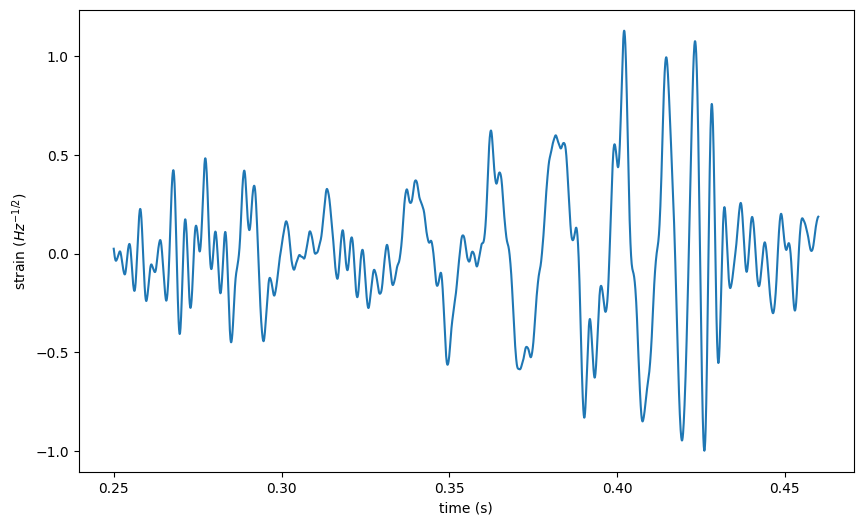

In [ ]:
import matplotlib.pyplot as plt

t = gw['Times'] # get the times column
h = gw['Strains'] # get the strains column
plt.figure(figsize=(10, 6)) # changing the size of the figure for readability
plt.plot(t, h) # you can plot directly with Series objects
plt.xlabel('time (s)') # label x axis
plt.ylabel('strain ($Hz^{-1/2}$)') # label y axis (using LaTeX notation for units; it's fine if you don't recognize it)

One parameter of importance to GW research is the maximum amplitude of an event. We call the point at which a GW reaches this max amplitude the *merger*. The detectors current available to LIGO (the Laser Interferometer Gravitational-Wave Observatory) can detect strains of order $\sim 10^{-22}$. This means that a detector several kilometers long can detect length changes due to gravitational waves around the size of an atomic nucleus.

We'll do a rudimentary sanity check to see if this is a detectable gravitational wave by finding the maximum amplitude point and calling it the merger. This isn't a great assumption, since noise in the detectors will bias these points. A more robust test would involve cleaning the noise in the data and finding the maximum frequency point, but that requires more advanced techniques we won't get into.

**Your task:** Print out the maximum and minimum strain values from the data. We'll take the largest absolute value to be the merger. Is this larger than the maximum sensitivity of LIGO?

Also, get the time at which this maximum amplitude occurs.

In [ ]:
high = h.max() # max point
low = h.min() # min point
if abs(high) > abs(low):
    amp = (high) # set max amp to high point if abs val is greatest
else:
    amp = (low) # set min amp to low point if abs val is greatest
print(f'Maxmimum amplitude: {amp}*10^-21') # print max amp

conditions = (gw['Strains'] == amp) # set a condition that prints out the rows with the max amp
maxt = t.loc[conditions] # locate the row in the time Series that fulfills this condition
maxt # print out the row to get the index

Maxmimum amplitude: 1.1278493200502389*10^-21


2492    0.4021
Name: Times, dtype: float64

In [ ]:
max_time = t[2492] # get the value of time at this index
max_time

0.402099609375

Gravitational wave events often occur over very short timespans. In the case of black hole mergers like GW150914, the objects can end up moving so fast that they are *relativistic*, meaning our classical mechanical models can no longer accurately describe them.

**Your task:** Calculate the amount of time that passed from the start of data to the merger. As a sanity check, this should be shorter than the full length of the dataset, ~0.21 seconds.

In [ ]:
max_time - t[0] # subtract initial time from max amp time

0.152099609375

We can use numerical simulations to attempt to clean up the noise in the data for more accurate analyses. We won't get into this analysis since it requires robust knowledge of general relativity, but I will provide the result from the initial observation paper. You can download the data below:

In [ ]:
!wget https://raw.githubusercontent.com/acorreia61201/SAOPythonPrimer/main/files/GW150914_model.csv

--2023-06-12 14:50:02--  https://raw.githubusercontent.com/acorreia61201/SAOPythonPrimer/main/files/GW150914_model.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131261 (128K) [text/plain]
Saving to: ‘GW150914_model.csv’

GW150914_model.csv  100%[===================>] 128.18K  --.-KB/s    in 0.02s   

2023-06-12 14:50:02 (5.72 MB/s) - ‘GW150914_model.csv’ saved [131261/131261]



The columns have the same meanings as the raw data.

**Your task:** Read in the above dataset using `pandas`. Check that this data set has the same first and last times as the raw data.

In [ ]:
gw_model = pd.read_csv('GW150914_model.csv') # read in model data
gw_model

,t,h
0,0.250050,0.435578
1,0.250111,0.433388
2,0.250172,0.431139
3,0.250233,0.428833
4,0.250294,0.426469
...,...,...
3435,0.459706,-0.000549
3436,0.459767,-0.000527
3437,0.459828,-0.000501
3438,0.459889,-0.000472


**Your task:** Now, on one set of axes, plot the raw data in solid blue and the model data in solid black. Label them accordingly, and give this plot the same axis titles as the previous plot. How well does the model match the raw data? Are there points where the model seems to be a better fit than others?

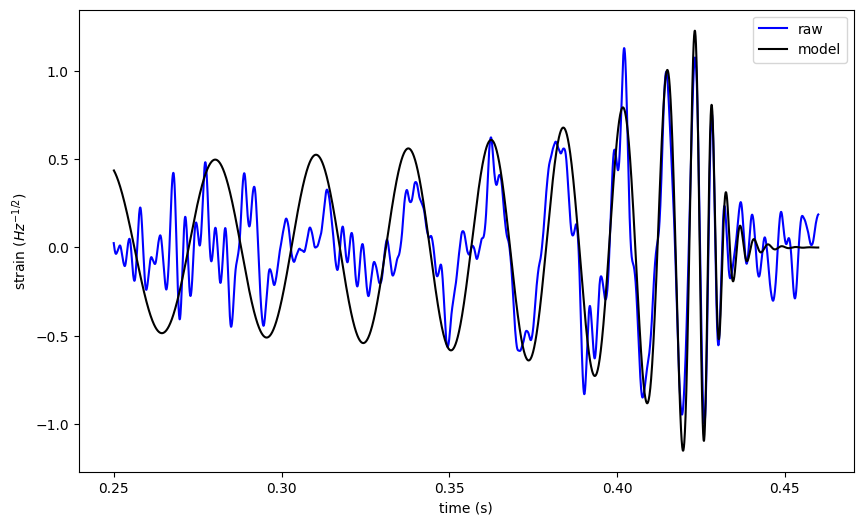

In [ ]:
tmod = gw_model['t'] # times in model data
hmod = gw_model['h'] # strains in model data
plt.figure(figsize=(10, 6)) # resize figure
plt.plot(t, h, color='blue', label='raw') # raw data from above
plt.plot(tmod, hmod, color='black', label='model') # model data
plt.xlabel('time (s)') # x label
plt.ylabel('strain ($Hz^{-1/2}$)') # y label
plt.legend() # generate legend

## Exercise 2.2: Analyzing Solar System Orbits

Download the following dataset:

In [ ]:
!wget https://raw.githubusercontent.com/acorreia61201/SAOPythonPrimer/main/files/planets.csv

--2023-06-12 14:50:10--  https://raw.githubusercontent.com/acorreia61201/SAOPythonPrimer/main/files/planets.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 490 [text/plain]
Saving to: ‘planets.csv.1’

planets.csv.1       100%[===================>]     490  --.-KB/s    in 0s      

2023-06-12 14:50:10 (31.7 MB/s) - ‘planets.csv.1’ saved [490/490]



**Your task:** Use `pandas` to load in and view the data in this csv file.

In [ ]:
data = pd.read_csv('planets.csv') # read in data
data
# note: the column names have asterisks; you have to use quotation marks to call them

,'planet','distance','period_rot','period_orb','eccentricity'
0,'Mercury',57909227,58.64600,0.240847,0.205636
1,'Venus',108209475,-243.01800,0.615197,0.006777
2,'Earth',149598262,0.99727,1.000017,0.016711
3,'Mars',227943824,1.02600,1.880848,0.093394
4,'Jupiter',778340821,0.41354,11.862615,0.048386
5,'Saturn',1426666422,0.44400,29.447498,0.053862
6,'Uranus',2870658186,-0.71800,84.016846,0.047257
7,'Neptune',4498396441,0.67100,164.791320,0.008590
8,'Pluto',5906440628,153.29350,247.740660,0.248827


This dataset contains some orbital parameters for the planets in the solar system (and Pluto). The distance column gives the average distance to the Sun in kilometers, period_rot gives the rotational period in Earth days, and period_orb gives the orbital period in Earth years. The last column gives the *eccentricity* of each planet, a parameter that describes how elliptical the planets' orbits are. For bound orbits, this value ranges between 0 and 1, with 0 representing a perfect circle, and increasing values representing a more "stretched-out" orbit.

As you may expect, the distance measurements are very large, into the billions for the farthest planets. In solar system astronomy, it's convenient to use *astronomical units*, or *AU*, to measure distances. We can use the conversion $1 AU = 1.496 \times 10^8 km$ to convert the values in our dataset.

**Your task:** Modify the `DataFrame` above so that the distance column is in units of AU. As a sanity check, 1 AU is defined as the average distance from the Earth to the Sun, so the Earth's distance should be something close to 1.

In [ ]:
data["'distance'"] = data["'distance'"]/(1.496*10**8) # do conversion in-place
data

,'planet','distance','period_rot','period_orb','eccentricity'
0,'Mercury',0.387094,58.64600,0.240847,0.205636
1,'Venus',0.723325,-243.01800,0.615197,0.006777
2,'Earth',0.999988,0.99727,1.000017,0.016711
3,'Mars',1.523689,1.02600,1.880848,0.093394
4,'Jupiter',5.202813,0.41354,11.862615,0.048386
5,'Saturn',9.536540,0.44400,29.447498,0.053862
6,'Uranus',19.188892,-0.71800,84.016846,0.047257
7,'Neptune',30.069495,0.67100,164.791320,0.008590
8,'Pluto',39.481555,153.29350,247.740660,0.248827


Using this data, we can do a simple verification of *Kepler's third law*. In its simplest form, it reads:

\begin{equation}
P \propto a^{3/2}
\end{equation}

This means that the period $P$ of a planet's orbit is proportional to the *semimajor axis* $a$ raised to the power of $3/2$. We define the semimajor axis as the average between the maximum and minimum distances of a planet from the Sun.

**Your task:** Generate a scatterplot of $P$ versus $a^{3/2}$ using your dataset. Plot this on a loglog scale and label your axes 'Period (Earth yrs)' and 'Semimajor axis (AU)'.

On a loglog scale, the above proportionality will produce a straight line. Does your plot match this?

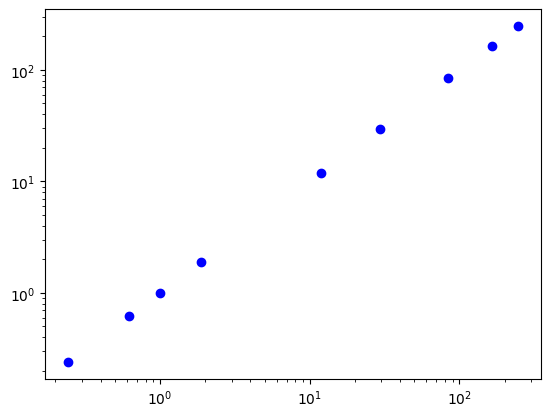

In [ ]:
p = data["'period_orb'"] # call in orbital periods
a = data["'distance'"] # cal in distances
plt.loglog(p, a**(3/2), 'bo') # plot on loglog

The *mean orbital velocity* is the average speed at which an object orbits the Sun. There are two ways we can calculate this. By using Newton's law of universal gravitation and assuming the mass of the planet is much less than that of the Sun, we can calculate velocity of an object with distance $a$ as:

\begin{equation}
v = \sqrt{\frac{GM}{a}}
\end{equation}

$G = 6.6743 \times 10^{-11} m^3kg^{-1}s^{-2}$ is *Newton's gravitational constant*, and $M = 2 \times 10^{30} kg$ is the mass of the Sun.

We can also approximate the velocity using $a$, $P$, and eccentricity $e$ with the following (this comes from evaluating an *elliptic integral*, an advanced calculus concept we won't get into):

\begin{equation}
v \approx \frac{2\pi a}{P}\bigg[ 1 - \frac{e^2}{4} \bigg]
\end{equation}

**Your task:** For each planet, calculate its approximate mean orbital velocity using the second equation. Convert your velocities to $m/s$, i.e. convert $a$ to meters ($1 AU = 1.496 \times 10^{11} m, 1 km = 1000 m$) and $P$ to seconds ($1 year = 3.154 \times 10^7 s$). You may reload the dataset if you'd prefer to convert from kilometers rather than AUs.

In [ ]:
import numpy as np

a = a.to_numpy()*1.496*10**11 # convert distance series to numpy array, then apply element-wise conversion
p = p.to_numpy()*3.154*10**7 # convert period series to numpy array, then apply element-wise conversion
e = data["'eccentricity'"].to_numpy() # convert eccentricity series to numpy array

approx = 2*np.pi*a/p*(1 - e**2/4) # calculate approximations for all a, p, e elements

**Your task:** Plot your points above as a scatterplot of velocity versus $a$. On the same axes, plot the first equation along a range of 500 points on $a = [10^7, 10^{10}] km$. Label the axes accordingly. How well do the data points match the Newtonian model?

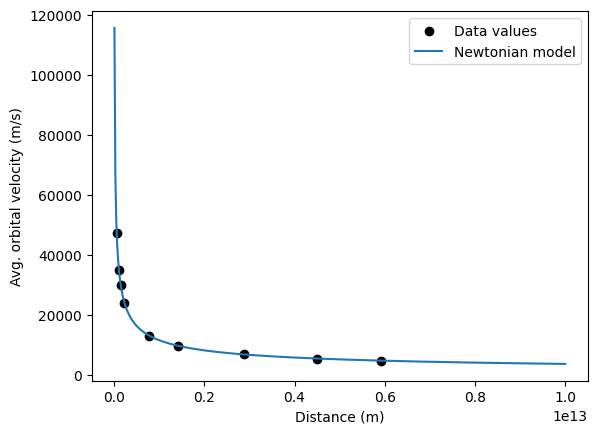

In [ ]:
# note: the original problem said to generate an array of [10^7, 10^10] m; this should have been km to match the orders of magnitude in the data
a_vals = np.linspace(10**10, 10**13, 500) # generate list of a values in meters (1 km = 10**3 m)
v_vals = np.sqrt(6.6743*10**-11*2*10**30/a_vals) # calculate Newtonian velocities using generated grid
plt.scatter(a, approx, color='black', marker='o', label='Data values') # plot velocity approximations versus data distances
plt.plot(a_vals, v_vals, label='Newtonian model') # plot modeled distances and velocities
plt.xlabel('Distance (m)') # x label
plt.ylabel('Avg. orbital velocity (m/s)') # y label
plt.legend() # generate legend